# Building a model

From the description of the dataset: 

The column, class, lists a binary classification for each stock: -

- For each stock, if the Price Var[%] is positive, class would be 1. From a trading perspective, 1 identifies the stocks that a hypothetical trader should BUY at the start if the year and sell at the end of the year to make a profit.

- For each stock, if the Price Var[%] is negative, class would be 0. From a trading perspective, 0 identifies the stocks that a hypothetical trader should NOT BUY, since their value will decrease, meaning a loss of capital


As such, we will be looking into training a machine learning model (utilizing the class column) so that it learns to classify those stocks that are buy-worthy and not buy-worthy.

The first of such model we will be looking at is a Multi-Variate Classification tree. 

Utilizing the factors that we have identified in our EDA, we will attempt create a model to reliably classify the different stocks into either class 0 or 1. 

This will allow us to reliably predict if a stock is worth buying at the start of the year and holding on to it until the end of the year, where one can sell it for profit.

## Multi-variate Classification Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('2018_filtered.txt')
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,2.636746e+09,103792000.0,-0.004,-0.02910,0.673,190855000.0,0.0000,0.0,-26.687113,0,Technology
1,5.361960e+09,853769000.0,0.073,-0.25870,-8.191,523610000.0,0.0000,0.0,-42.583392,0,Consumer Cyclical
2,1.798500e+09,412100000.0,-0.158,-0.07130,4.204,404200000.0,0.0085,13000000.0,66.143385,1,Basic Materials
3,5.816440e+08,479440000.0,0.284,0.17450,4.448,427656000.0,0.0000,29000.0,-9.197867,0,Energy
4,1.589000e+09,84532000.0,0.044,0.07485,9.939,303107000.0,0.0000,0.0,100.552499,1,Basic Materials
...,...,...,...,...,...,...,...,...,...,...,...
1726,6.966000e+06,3331000.0,0.305,0.06250,18.620,4573000.0,0.0193,0.0,11.671183,1,Financial Services
1727,2.307974e+07,6089738.0,0.080,0.06010,9.580,2302113.0,0.0000,0.0,-3.076927,0,Consumer Defensive
1728,3.546600e+07,5710000.0,0.031,0.01090,5.464,6593000.0,0.0000,0.0,27.118650,1,Consumer Cyclical
1729,0.000000e+00,2986000.0,0.044,0.35880,1.618,-816000.0,0.0000,38000.0,-22.159090,0,Healthcare


In [11]:
y = pd.DataFrame(df["Class"])

predictors = pd.DataFrame(df[["Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", 
                                 "Operating Cash Flow", "Dividend Yield", "R&D Expenses"]])
X = predictors

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7234206471494607
True Postitive Rate 		: 0.8531317494600432
True Negative Rate 		: 0.40053763440860213
False Negative Rate 		: 0.1468682505399568
False Postitive Rate 		: 0.5994623655913979

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7066974595842956
True Postitive Rate 		: 0.8338762214983714
True Negative Rate 		: 0.3968253968253968
False Negative Rate 		: 0.16612377850162866
False Postitive Rate 		: 0.6031746031746031



<AxesSubplot:>

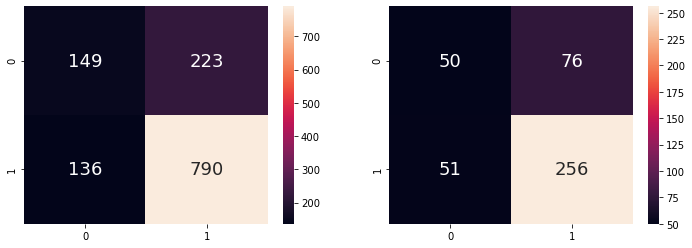

In [16]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(334.8, 543.6, 'Book Value per Share <= 6.654\ngini = 0.411\nsamples = 1298\nvalue = [375, 923]\nclass = 1'),
 Text(167.4, 326.16, 'Dividend Yield <= 0.009\ngini = 0.499\nsamples = 391\nvalue = [187, 204]\nclass = 1'),
 Text(83.7, 108.72000000000003, 'gini = 0.499\nsamples = 323\nvalue = [170, 153]\nclass = 0'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.375\nsamples = 68\nvalue = [17, 51]\nclass = 1'),
 Text(502.20000000000005, 326.16, 'Profit Margin <= 0.034\ngini = 0.329\nsamples = 907\nvalue = [188, 719]\nclass = 1'),
 Text(418.5, 108.72000000000003, 'gini = 0.449\nsamples = 235\nvalue = [80, 155]\nclass = 1'),
 Text(585.9, 108.72000000000003, 'gini = 0.27\nsamples = 672\nvalue = [108, 564]\nclass = 1')]

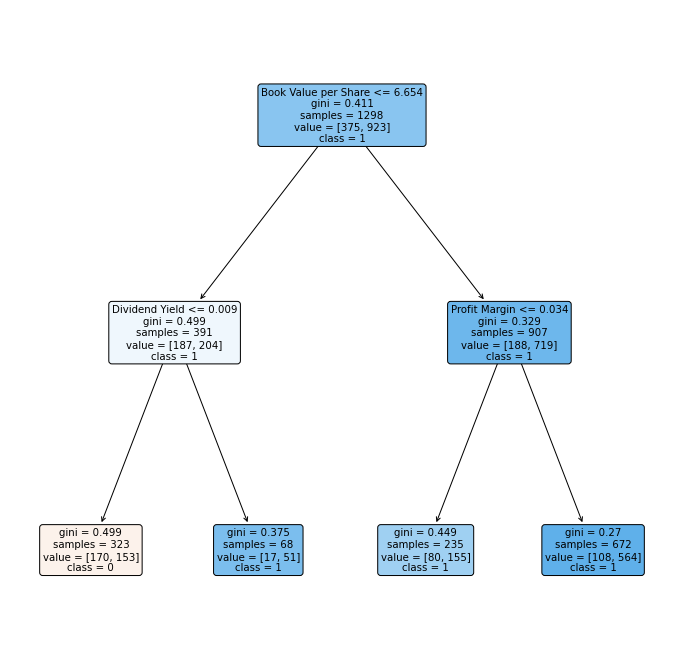

In [13]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])

The model with a depth of 2 has a Classification Accuracy of 0.72 for the train set and 0.70 for the test set.

Looking to improve the Classification accuracy for the test set, we looked into increasing the depth of the classification tree.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7442218798151001
True Postitive Rate 		: 0.8449023861171366
True Negative Rate 		: 0.4973404255319149
False Negative Rate 		: 0.15509761388286333
False Postitive Rate 		: 0.5026595744680851

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6974595842956121
True Postitive Rate 		: 0.8135048231511254
True Negative Rate 		: 0.4016393442622951
False Negative Rate 		: 0.1864951768488746
False Postitive Rate 		: 0.5983606557377049



<AxesSubplot:>

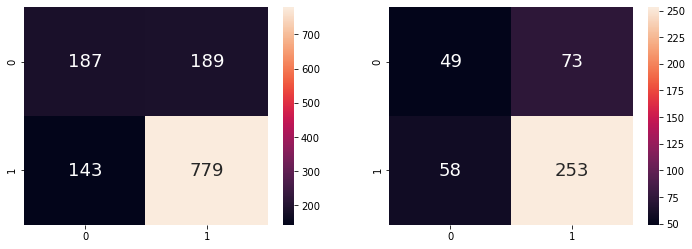

In [7]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

The model with a depth of 4 has a classification accuracy of 0.74 for the train dataset and 0.69 for the test dataset. 

Compared to the previous model with a depth of 2, it has a lower classification accuracy for the test set but higher classification accuracy for the train set. This implies that the model fo depth 4 might be overfitting the data and is thus, not reliable. As such, the model of depth 2 is more reliable. 

Looking to improve our model and get better classification accuracy, we looked into another machine learning model: Random Forest Classification. 

## Random Forest

In [17]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

<ipython-input-39-7bc6f316b3bf>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7611710323574731
True Postitive Rate 		: 0.9419496166484118
True Negative Rate 		: 0.33246753246753247
False Negative Rate 		: 0.05805038335158817
False Postitive Rate 		: 0.6675324675324675

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7043879907621247
True Postitive Rate 		: 0.90625
True Negative Rate 		: 0.13274336283185842
False Negative Rate 		: 0.09375
False Postitive Rate 		: 0.8672566371681416



<AxesSubplot:>

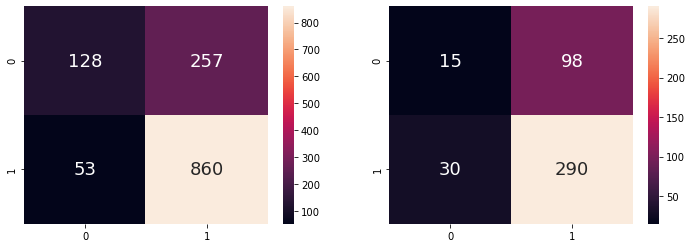

In [39]:
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 2)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model of approximately 100 trees of depth 2, we managed to obtain a classification accuracy of approximately 0.76 for the training data set and a classification accuracy of approximately 0.70 for the test data set. 

Looking to refine the classification accuracy, we looked into changing the n-estimators and depth of the tree.

<ipython-input-31-be62f3f3c777>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7673343605546995
True Postitive Rate 		: 0.9795479009687836
True Negative Rate 		: 0.23306233062330622
False Negative Rate 		: 0.02045209903121636
False Postitive Rate 		: 0.7669376693766937

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7251732101616628
True Postitive Rate 		: 0.9638157894736842
True Negative Rate 		: 0.16279069767441862
False Negative Rate 		: 0.03618421052631579
False Postitive Rate 		: 0.8372093023255814



<AxesSubplot:>

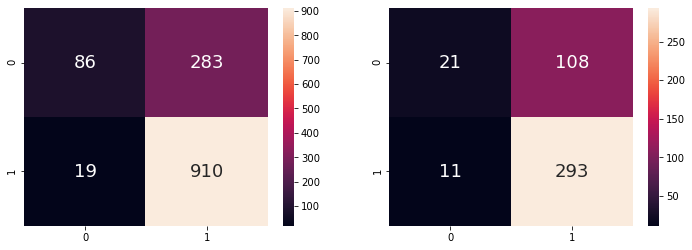

In [31]:
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model of approximately 500 trees of depth 4, we managed to obtain a classification accuracy of approximately 0.76 for the training data set and a classification accuracy of approximately 0.72 for the test data set.

While the classification accuracy for the training data set has dropped slightly, there was an increase in the classification accuracy in the test data set, making this model better than the previous model.

Comparing this random forest model and the multivariate classification tree model, we can see that there is an increase in the classification accuracy for both the train(0.76-r.forest vs 0.73-c.tree) and test data sets(0.72-r.forest vs 0.70-c.tree). 

Seeking to refine our random forest model, we decided to look into GridSearch to help us hypertune our parameters such that our model would be more accurate.

## Hypertuning with GridSearchCV

In [41]:
# Import GridSearchCV from Scikit-Learn
from sklearn.model_selection import GridSearchCV

In [43]:
# Create the param grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 100)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2,6],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

rf_Model = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [44]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   31.9s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   58.0s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed:  8.2min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 15.2min

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 104, 108, 112, 116, 120, 124,
                                          128, 132, 136, 140, 144, 148, 152,
                                          156, 160, 164, 168, 172, 176, 180,
                                          184, 188, 192, 196, 201, 205, 209,
                                          213, 217, ...]},
             verbose=2)

In [45]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 201}

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8266563944530047
True Postitive Rate 		: 0.9704271631982475
True Negative Rate 		: 0.4857142857142857
False Negative Rate 		: 0.029572836801752465
False Postitive Rate 		: 0.5142857142857142

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7090069284064665
True Postitive Rate 		: 0.89375
True Negative Rate 		: 0.18584070796460178
False Negative Rate 		: 0.10625
False Postitive Rate 		: 0.8141592920353983



<AxesSubplot:>

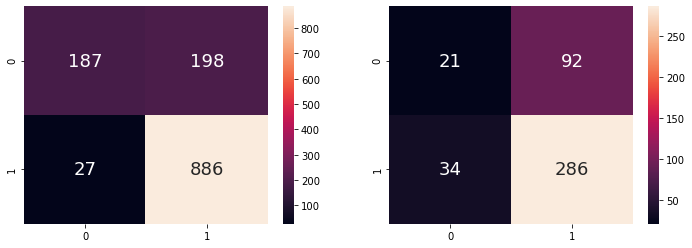

In [48]:
# Predict Response corresponding to Predictors
y_train_pred = rf_Grid.predict(X_train)
y_test_pred = rf_Grid.predict(X_test)

train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf_Grid.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf_Grid.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

(need help here)